In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('../plotting.mplstyle')
import h5py
import sys
sys.path.append('./../data/')
from makeCorner import *
sys.path.append('./../code/')
from piCurve import *
from load_data import *

blue = "#1f78b4"
green = "#33a02c"
red = "#e31a1c"

In [4]:
results = h5py.File("./../data/birefringence_variable_evolution.hdf","r")
Omg_I = np.array(results['posterior']['Omg_I_model'])
Omg_V = np.array(results['posterior']['Omg_V_model'])
frequencies = np.array(results['posterior']['frequencies'])

In [23]:
spectra = get_all_data(trim_nans=False,f_max=2000)

sigma_H1L1_O1 = np.array(spectra['H1L1_O1'][2])
sigma_H1L1_O2 = np.array(spectra['H1L1_O2'][2])
sigma_H1L1_O3 = np.array(spectra['H1L1_O3'][2])
sigma_H1V1_O3 = np.array(spectra['H1V1_O3'][2])
sigma_L1V1_O3 = np.array(spectra['L1V1_O3'][2])

one_over_sigmas = 1./sigma_H1L1_O1 + 1./sigma_H1L1_O2 + 1./sigma_H1L1_O3 + 1./sigma_H1V1_O3 + 1./sigma_L1V1_O3
sigmas = 1./one_over_sigmas

PI_freqs = spectra['H1L1_O1'][0]
PI_values = pi_curve(freqs,sigmas,-10,10)

/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_33650/1276114661.py:10: RuntimeWarning: divide by zero encountered in divide
  sigmas = 1./one_over_sigmas


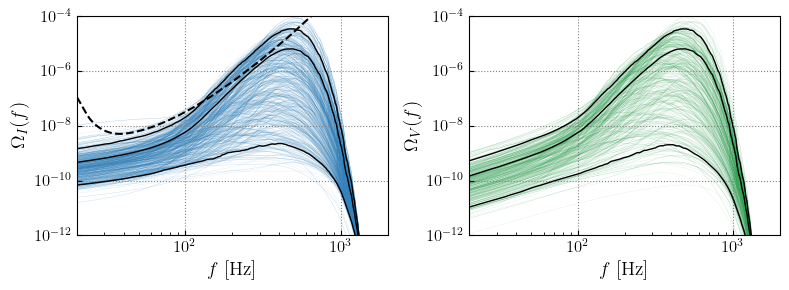

In [46]:
fig,axs = plt.subplots(1,2,figsize=(8,3))

ax = axs[0]
ax.set_rasterization_zorder(1)
for i in np.random.choice(np.arange(Omg_I.shape[1]),size=800):
    ax.plot(frequencies,Omg_I[:,i],color='#3182bd',lw=0.2,alpha=0.2,zorder=0)
ax.plot(frequencies,np.mean(Omg_I,axis=1),color='black',lw=1)
ax.plot(frequencies,np.quantile(Omg_I,0.95,axis=1),color='black',lw=1)
ax.plot(frequencies,np.quantile(Omg_I,0.05,axis=1),color='black',lw=1)
ax.plot(PI_freqs,PI_values,color='black',ls='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$f$ [Hz]')
ax.set_ylabel('$\Omega_I(f)$')
ax.set_xlim(20,2000)
ax.set_ylim(1e-12,1e-4)

ax = axs[1]
ax.set_rasterization_zorder(1)
for i in np.random.choice(np.arange(Omg_V.shape[1]),size=500):
    ax.plot(frequencies,Omg_V[:,i],color='#31a354',lw=0.2,alpha=0.2,zorder=0)
ax.plot(frequencies,np.mean(Omg_V,axis=1),color='black',lw=1)
ax.plot(frequencies,np.quantile(Omg_V,0.95,axis=1),color='black',lw=1)
ax.plot(frequencies,np.quantile(Omg_V,0.05,axis=1),color='black',lw=1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$f$ [Hz]')
ax.set_ylabel('$\Omega_V(f)$')
ax.set_xlim(20,2000)
ax.set_ylim(1e-12,1e-4)

plt.tight_layout()
plt.savefig('OmgGW_constraints.pdf',bbox_inches='tight',dpi=200)
plt.show()

In [31]:
snrs = np.zeros(Omg_I.shape[1])
for i in range(Omg_I.shape[1]):
    
    Omg_I_interpolated = np.interp(PI_freqs,frequencies,Omg_I[:,i])
    snrs[i] = np.sqrt(np.sum(Omg_I_interpolated**2/sigmas**2))

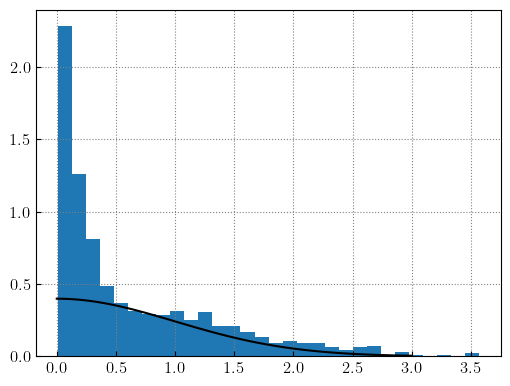

In [42]:
fig,ax = plt.subplots()
ax.hist(snrs,density=True,bins=30)

xs = np.linspace(0,3,100)
ys = np.exp(-xs**2/2.)/np.sqrt(2.*np.pi)
ax.plot(xs,ys,color='black')

plt.show()